In [45]:
# Goal: predict Purchase using other variables (in OJ data set)
# using classification trees
rm(list=ls())
library(ISLR)          
library(MASS)          
library(tree)          # classification trees

In [46]:
# Part a: Train/test:
fix(OJ)
num_row     <- nrow(OJ)      
train_size  <- 800     # as specified in problem 
set.seed(1)
index       <- sample(1:num_row, train_size) 
# Split into train and test:
train       <- OJ[index,]
test        <- OJ[-index,]
print(nrow(train)); print(nrow(test)); print(num_row)

[1] 800
[1] 270
[1] 1070



Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

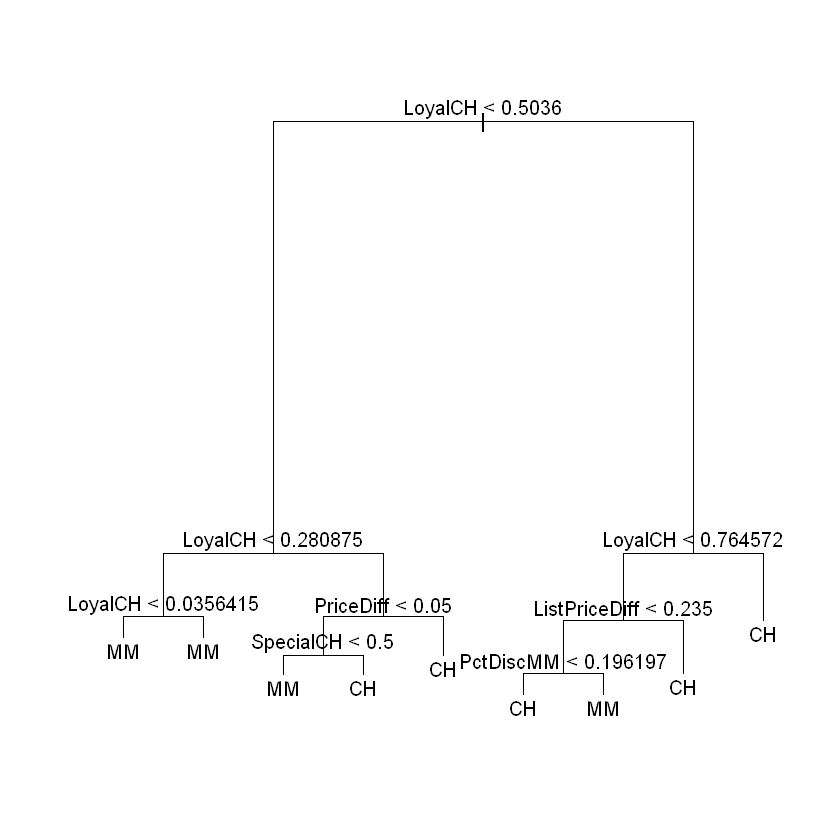

In [47]:
# Part b: Fit a (very large) tree.
set.seed(2)
oj_tree <- tree(Purchase~., data=train)
summary(oj_tree)
plot(oj_tree)
text(oj_tree, pretty=0)
# The results obtained include a tree with 9 terminal nodes.
# The training error rate is 0.1588
# LoyalCH is by far the most important variable early on.

In [48]:
# Part c: Type in name of tree object to get detailed output.
# Pick one of the terminal nodes, and interpret the info displayed:
oj_tree
# I choose Node #7.
#  The asterisk at the end means that it is a terminal node
#  It is the group of observations whose value of LoyalCH is both > 0.508643
#     AND > 0.764572; i.e. the obs whose val of LoyalCH is > 0.764572
#  278 of the 800 total obs are in this node.
#  'CH'=Citrus Hill is the predicted value of the categorical response
#     variable 'Purchase' for this node.
#  86.14 is the deviance associated with the obs in this node.
#  Lastly, (0.96403, 0.03597) are the output for y_prob, which are the estimated
#     probs for the ('CH','MM') classes, for an obs given it is assigned to this node.

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196197 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196197 17   12.32 M

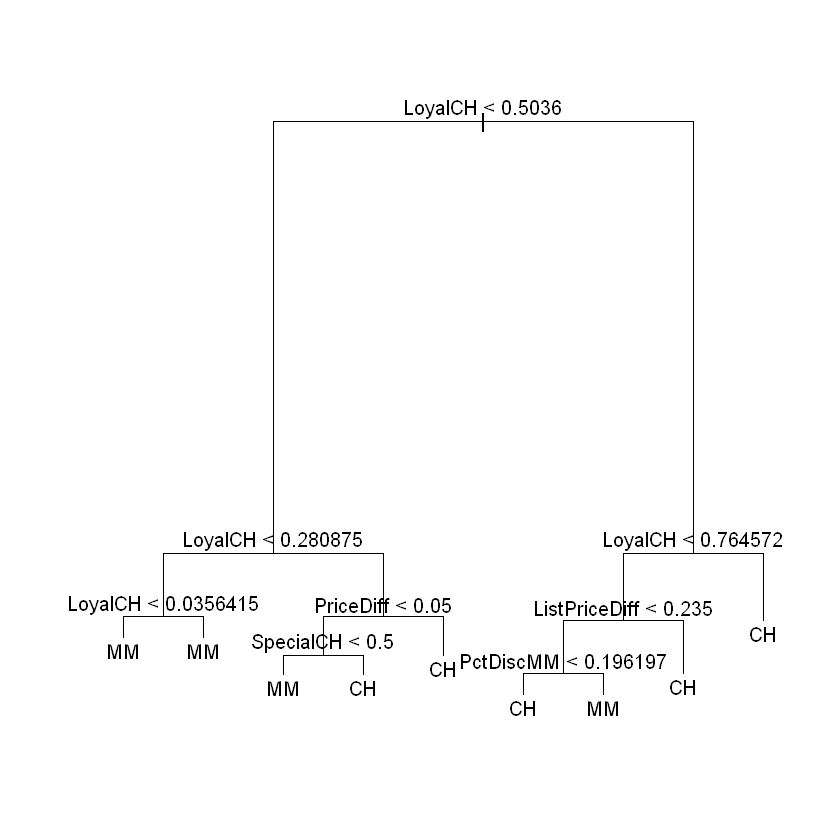

In [49]:
# Part d: Create a plot of tree, and interpret results.
plot(oj_tree)
text(oj_tree, pretty=0)
# LoyalCH is by far the most important variable early on, as it is the 
# variable the algorithm splits by for the splits in the first 2 layers.
# One interpretation: OJ customers with smaller vals of LoyalCH 
# (brand loyalty to Citrus Hill) choose Minute Maid more often, and 
# larger brand loyalty to CH choose CH more often = intuitive.
# List or Price differences between MM and CH are less important, however
# they appear to add some ancillary predictive value.  As expected the greater
# the price of MM over CH is, the more likely a customer is to choose CH,
# and vice versa.  Thus to summarize, loyalty=very important, relative price
# difference is important, but less so.

In [50]:
# Part e: Predict response on test, produce confusion matrix, and estimate
# error rate of predictions:
test_pred <- predict(oj_tree, newdata=test, type="class")
# Confusion Matrix:
cm <- table(test_pred, test$Purchase)
print(cm)
# Est error rate:
err_rt <- (cm[1,2]+cm[2,1])/sum(cm)
print(round(err_rt,4))
# Error rate is about 17%.

         
test_pred  CH  MM
       CH 160  38
       MM   8  64
[1] 0.1704


In [51]:
# Part f: Apply cvtree() function to tree to estimate optimal tree size:
set.seed(3)
cv_tree <- cv.tree(oj_tree, FUN=prune.misclass)
cv_tree
# The optimal tree size is the one with 7 terminal nodes, as it has lowest
# cv classification error.

$size
[1] 9 8 7 4 2 1

$dev
[1] 152 152 149 153 173 315

$k
[1]       -Inf   0.000000   3.000000   4.333333  10.500000 151.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

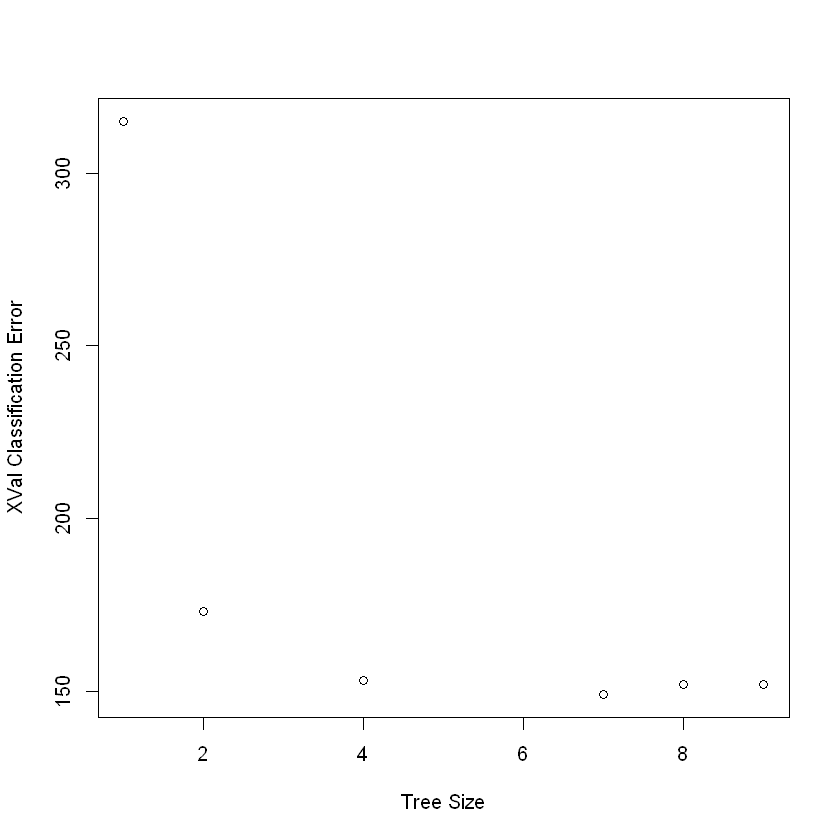

In [52]:
# Part g: Produce a plot with x=tree size, y=cv classification error:
plot(cv_tree$size, cv_tree$dev, xlab="Tree Size", 
     ylab="XVal Classification Error")
# Part h: Again, the tree size of 7 corresponds to lowest CV
# classification error rate.

In [53]:
# Part i: Produce a tree with the indicated optimal amount of nodes:
pruned_tree <- prune.misclass(oj_tree, best=7)

In [55]:
# Part j: Compare training error rates between pruned and unpruned tree:
summary(pruned_tree); summary(oj_tree)
# As expected, the unpruned tree (15.9%) has a lower training error rate
# than the pruned tree (16.3%).  This is not surprising, as the larger
# unpruned tree should have less bias, but we can not yet assess
# the net effect on error without understanding variance change.


Classification tree:
snip.tree(tree = oj_tree, nodes = c(4L, 10L))
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "PctDiscMM"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7748 = 614.4 / 793 
Misclassification error rate: 0.1625 = 130 / 800 


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [56]:
# Part k: Compare the test error rates between the pruned and unpruned trees:
pruned_tree_pred <- predict(pruned_tree, newdata=test, type="class")
# Confusion Matrix:
cm_pr <- table(pruned_tree_pred, test$Purchase)
print(cm_pr)
# Est error rate:
err_rt_pr <- (cm_pr[1,2]+cm_pr[2,1])/sum(cm_pr)
print(round(err_rt_pr,4))
# Test error rate of pruned tree is 16.3% < 17% = test error rate of the 
# unpruned tree (computed above). Clearly pruning appears mildly worthwhile!

                
pruned_tree_pred  CH  MM
              CH 160  36
              MM   8  66
[1] 0.163
